<h1>Fashion MNIST Dataset Classification using Tensorflow</h1>
<p>In this tutorial you will see i will build a power full fashion classification model on Fashion mnist dataset using Tensorflow from scratch</p>

In [0]:
#importing the library
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.optimizers import RMSprop

<h1>Defining Classback function

In [0]:
#defining the class using tensorflow callback with epochs
class myCallback(tf.keras.callbacks.Callback):
  def one_epoch_end(self,epoch, logs={}):
    #defining the loss
    if (logs.get('loss')<4.0):
      print("Reach 60% accuracy so cancelling the training")
      self.model.stop_training=True
      
    

In [0]:
#calling the deifnining class
callback=myCallback()

In [9]:
import numpy as np
import pandas as pd
#getting the datasset
mnist = tf.keras.datasets.fashion_mnist
(training_data,training_label),(test_data,test_label)= mnist.load_data()
training_data=training_data/255.0
test_data=test_data/255.0

print("Training shape is :",training_data.shape)
print('Test shape is :',test_data.shape)

Training shape is : (60000, 28, 28)
Test shape is : (10000, 28, 28)


<h1>Plotting Fashion MNIST Images</h1>

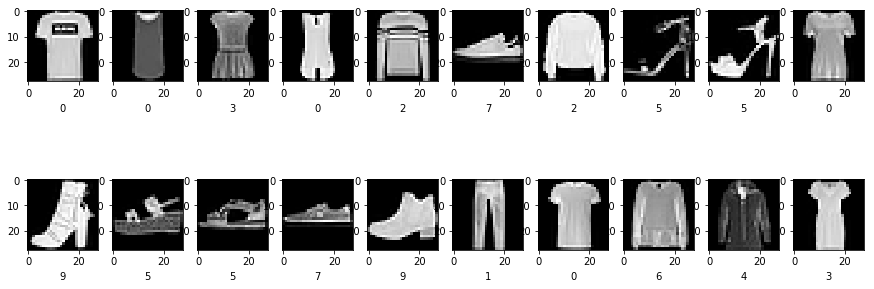

In [10]:
plt.figure(figsize=(15,15))
for i in range(1,21):
    row = i
    grid_data =training_data[row]
    plt.subplot(5,10,row)
    plt.imshow(grid_data, interpolation = "none", cmap = "gray")
    plt.xlabel(training_label[row],labelpad=5)
plt.show()

In [11]:
print(training_data[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [32]:
#defining the neural network
model = tf.keras.models.Sequential()

#defining the layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#compiling the my model
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#fitting my model into the dataset
history=model.fit(training_data,training_label, epochs=50, validation_data=(test_data, test_label),callbacks=[callback],verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 272us/sample - loss: 0.4726 - acc: 0.8305 - val_loss: 0.4079 - val_acc: 0.8547
Epoch 2/50
60000/60000 [==============================] - 16s 269us/sample - loss: 0.3547 - acc: 0.8704 - val_loss: 0.3911 - val_acc: 0.8603
Epoch 3/50
60000/60000 [==============================] - 16s 272us/sample - loss: 0.3224 - acc: 0.8808 - val_loss: 0.3631 - val_acc: 0.8701
Epoch 4/50
60000/60000 [==============================] - 16s 260us/sample - loss: 0.2957 - acc: 0.8909 - val_loss: 0.3598 - val_acc: 0.8706
Epoch 5/50
60000/60000 [==============================] - 15s 255us/sample - loss: 0.2792 - acc: 0.8964 - val_loss: 0.3314 - val_acc: 0.8833
Epoch 6/50
60000/60000 [==============================] - 16s 266us/sample - loss: 0.2651 - acc: 0.9014 - val_loss: 0.3472 - val_acc: 0.8737
Epoch 7/50
60000/60000 [==============================] - 16s 262us/sample - loss: 0.2510 - acc: 0.9057 

In [37]:
score = model.evaluate(test_data, test_label, verbose=0) 
print('Test score (Validation Loss):', score[0]) 
print('Test accuracy (Accuracy on Unseen Data):', score[1])


Test score (Validation Loss): 0.5309872527062893
Test accuracy (Accuracy on Unseen Data): 0.8902
